# **Importing Header Files**

In [ ]:
import sys

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json

import torch
import torchvision
import torchvision.transforms as T

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.5.4 

from timm import create_model

Running in Colab.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Setting are GPU'S**

In [ ]:
model_name = "convnext_xlarge_in22k"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ConvNeXt model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


# **Defining Transforms**

In [ ]:
from timm.data.constants import \
    IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

NORMALIZE_MEAN = IMAGENET_DEFAULT_MEAN
NORMALIZE_STD = IMAGENET_DEFAULT_STD
SIZE = 256

# Here we resize smaller edge to 256, no center cropping
transforms = [
              T.Resize(SIZE, interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

# **Loading Laebls**

In [ ]:
!wget https://dl.fbaipublicfiles.com/convnext/label_to_words.json
imagenet_labels = json.load(open('label_to_words.json'))

--2022-05-29 02:14:53--  https://dl.fbaipublicfiles.com/convnext/label_to_words.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773945 (756K) [application/json]
Saving to: ‘label_to_words.json.1’

label_to_words.json 100%[===================>] 755.81K   789KB/s    in 1.0s    

2022-05-29 02:14:55 (789 KB/s) - ‘label_to_words.json.1’ saved [773945/773945]



# **Loading Test Image**

In [ ]:
!wget https://dl.fbaipublicfiles.com/convnext/test.jpeg
img = PIL.Image.open('/content/5.jpg')
img_tensor = transforms(img).unsqueeze(0).to(device)

--2022-05-29 02:14:55--  https://dl.fbaipublicfiles.com/convnext/test.jpeg
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165227 (161K) [image/jpeg]
Saving to: ‘test.jpeg.1’

test.jpeg.1         100%[===================>] 161.35K   286KB/s    in 0.6s    

2022-05-29 02:14:56 (286 KB/s) - ‘test.jpeg.1’ saved [165227/165227]



# **Inference**

dumbbell 58.91%
barbell 3.22%
weight, free weight, exercising weight 2.48%
sportswear, athletic wear, activewear 2.20%
gym rat 1.34%


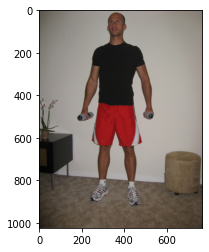

In [ ]:
# inference
output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

plt.imshow(img)